In [1]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t, k, a = symbols( 't k a' )
init_printing(use_unicode=True)

# Define the vector which is not parallel to any edge vector, which will tend to zero:

Phi = t*(N.i + 2*N.j)

# Set the fixed points of the action; P denotes those that belong
# to the core, and Q those that come from the cut extended core:

def P12(k,a):
    return Vector.zero

def P23(k,a):
    return k*N.i

def P13(k,a):
    return k*N.j

def Q12_1(k,a):
    return -a*N.j

def Q12_2(k,a):
    return -a*N.i

def Q23_2(k,a):
    return (k+a)*N.i

def Q23_3(k,a):
    return (k+a)*N.i - a*N.j

def Q13_1(k,a):
    return (k+a)*N.j

def Q13_3(k,a):
    return -a*N.i + (k+a)*N.j

# Basis for the edge/weight vectors for the points 

v1 = N.i

v2 = N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def h(P, edge1, edge2, edge3):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# The sum coming from the vertices of the core:

def Core(k,a):
    return g(P12(k,a), v1, v2, -v1, -v2) + g(P13(k,a), v1 - v2, v2, -v1 + v2, -v2) + g(P23(k,a), v1, -v1 + v2, -v1, v1 - v2)

def Exteriors(k,a):
    return g(Q23_3(k,a), v2, -v1 + v2, -v1 + v2, -v1) + g(Q23_2(k,a), -v1 + v2, -v1, -v1, -v2) + g(Q13_1(k,a), v1 - v2, -v1, -v2, -v2) + g(Q13_3(k,a), v1, -v2, v1 - v2, v1 - v2) + g(Q12_1(k,a), v1, v2, v2, -v1 + v2) + g(Q12_2(k,a), v1, v1, v2, v1 - v2)





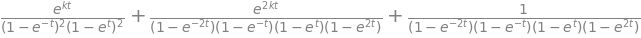

In [2]:
Core(k,a)

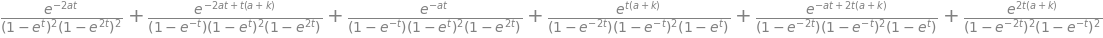

In [3]:
Exteriors(k,a)

In [4]:
def Sum(k,a):
    return Core(k,a) + Exteriors(k,a)

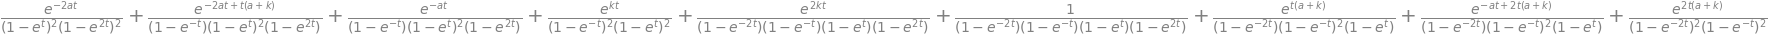

In [5]:
Sum(k,a)

In [6]:
# Take the limit as t -> 0 to get the Euler characteristic(?)

def LimitEulerCalculation(k,a):
    return limit(Sum(k,a),t,0)

In [7]:
factor(LimitEulerCalculation(k,a))

So:

$$ \text{RR}(T^{\ast}\mathbb{CP}_{a\text{-cut}}, \mathcal{O}(k)_{a\text{-cut}}) = \frac{(a+1)(a+2)(k+a+1)(k+a+2)}{4} =\frac{(a+1)(a+2)}{2} \cdot \frac{(k+a+1)(k+a+2)}{2}. $$

In [8]:
def LatticePointsSum(k,a):
    return f(Q12_1(k,a), v1, -v1 + v2) + f(Q12_2(k,a), v1 - v2, v2) + f(Q23_2(k,a), -v1 + v2, -v2) + f(Q23_3(k,a), v2, -v1) + f(Q13_1(k,a), v1 - v2, -v1) + f(Q13_3(k,a), v1, -v2)

In [9]:
def LimitLatticePoints(k,a):    
    return simplify(limit(LatticePointsSum(k,a), t, 0))

LimitLatticePoints(k,a)

So, if $P$ represents the polyptych:

$$ \#\{ \mathbb{Z}^{2} \cap P \} = 3a(k+a+1) + \frac{(k+1)(k+2)}{2}. $$

In [12]:
factor(simplify(LimitEulerCalculation(k,a) - LimitEulerCalculation(k,a-1)))

In [15]:
factor(LimitEulerCalculation(k,a) - LimitEulerCalculation(k,a-1) - LimitLatticePoints(k,0))

In [14]:
simplify(LimitEulerCalculation(k,a) - LimitEulerCalculation(k,a-1) - LimitLatticePoints(k,0))

In [5]:
def Core(k,a):
    return g(P12(k,a), v1, v2, -v1, -v2) + g(P13(k,a), v1 - v2, v2, -v1 + v2, -v2) + g(P23(k,a), v1, -v1 + v2, -v1, v1 - v2)

def Boundary(k,a):
    return f(Q12_1(k,a), v1, -v1 + v2) + f(Q12_2(k,a), v1 - v2, v2) + f(Q23_2(k,a), -v1 + v2, -v2) + f(Q23_3(k,a), v2, -v1) + f(Q13_1(k,a), v1 - v2, -v1) + f(Q13_3(k,a), v1, -v2)

def CutSum(k,a):
    return Core(k,a) + Boundary(k,a)


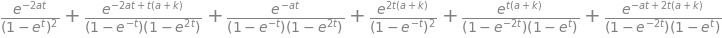

In [4]:
Boundary(k,a)

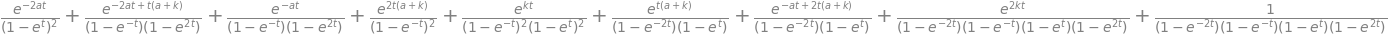

In [7]:
CutSum(k,a)